In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [77]:
import pyreadstat

# 使用2016台灣社會變遷資料庫 公民國家組 看是否可以用年齡和性別分類預測出對於政治熱衷程度

[資料網址](https://srda.sinica.edu.tw/datasearch_detail.php?id=1065)

In [16]:
ls

 磁碟區 C 中的磁碟是 Acer
 磁碟區序號:  2EF6-96C7

 C:\Users\Michael\Desktop\python 的目錄

2019/11/26  上午 02:31    <DIR>          .
2019/11/26  上午 02:31    <DIR>          ..
2019/11/26  上午 01:52    <DIR>          .ipynb_checkpoints
2019/09/12  下午 06:35           183,447 0911第一次上課.ipynb
2019/09/19  下午 07:01             4,655 0918 上課作業.ipynb
2019/09/23  上午 02:10           140,766 0918第二次上課-checkpoint.ipynb
2019/10/08  下午 05:10            47,822 0925上課作業.ipynb
2019/10/09  下午 10:26            18,525 0925第三次上課-checkpoint.ipynb
2019/10/20  下午 08:59            36,029 1002上課作業.ipynb
2019/10/05  上午 01:41             5,052 1002第四次上課.ipynb
2019/10/15  下午 04:40           112,933 1009上課作業.ipynb
2019/10/09  下午 12:06            73,516 1009第五次上課.ipynb
2019/11/15  下午 03:48           122,239 1016上課作業.ipynb
2019/10/20  下午 07:01            26,538 1016第六次上課.ipynb
2019/11/15  下午 03:35            20,219 1023上課作業1.ipynb
2019/10/25  上午 02:00             7,436 1023上課作業2.ipynb
2019/10/25  上午 02:07             3,107 1023上課作業3.i

In [50]:
df, meta = pyreadstat.read_sav('tscs2016q2.sav')

In [51]:
df["d15"]

0       3.0
1       4.0
2       4.0
3       3.0
4       4.0
5       5.0
6       4.0
7       2.0
8       5.0
9       5.0
10      4.0
11      4.0
12      3.0
13      3.0
14      4.0
15      5.0
16      3.0
17      2.0
18      3.0
19      3.0
20      4.0
21      4.0
22      4.0
23      3.0
24      4.0
25      4.0
26      4.0
27      5.0
28      3.0
29      2.0
       ... 
1936    5.0
1937    3.0
1938    5.0
1939    3.0
1940    4.0
1941    5.0
1942    5.0
1943    4.0
1944    4.0
1945    4.0
1946    5.0
1947    5.0
1948    5.0
1949    5.0
1950    5.0
1951    5.0
1952    4.0
1953    4.0
1954    4.0
1955    1.0
1956    4.0
1957    4.0
1958    4.0
1959    3.0
1960    3.0
1961    5.0
1962    5.0
1963    4.0
1964    5.0
1965    3.0
Name: d15, Length: 1966, dtype: float64

In [52]:
df["政治熱衷程度"]=df["d15"]

In [53]:
df["政治熱衷程度"][df["政治熱衷程度"]<4]=1

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df["政治熱衷程度"][df["政治熱衷程度"]!=1]=2

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
y=np.array(df["政治熱衷程度"])

In [58]:
y

array([1., 2., 2., ..., 2., 2., 1.])

In [59]:
x1=df["a2y"]

In [60]:
x1=np.array(105-x1)

In [61]:
x2=np.array(df["a1"])

In [62]:
x=np.c_[x1,x2]

In [33]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1450)

In [39]:
from sklearn.svm import SVC

In [64]:
clf=SVC(gamma='auto')

In [65]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_predict=clf.predict(x_test)

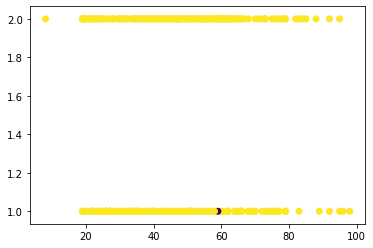

In [70]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict)

(20, 100)

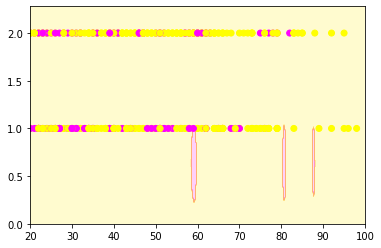

In [75]:
x0=np.arange(20,100,0.02)
y0=np.arange(0,2.3,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,cmap='spring',alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap='spring',c=y_test)
plt.xlim(20,100)

# 表示用年齡與性別無法準確預設對於政治的熱衷程度